In [13]:
# Need not be sorted, necessarily
a = [0, 1, 1, 1, 2, 3, 7, 7, 23]

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(a)
counted

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [14]:
from collections import Counter

recounted = Counter(a)
recounted


Counter({0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1})

In [15]:
recounted.items() == counted.items()

True

In [16]:
def ascii_histogram(seq) -> None:
    """A horizontal frequency-table/histogram plot."""
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5d} {1}'.format(k, '+' * counted[k]))

In [17]:
import random
random.seed(1)

vals = [1, 3, 4, 6, 8, 9, 10]
# Each number in `vals` will occur between 5 and 15 times.
freq = (random.randint(5, 15) for _ in vals)

data = []
for f, v in zip(freq, vals):
    data.extend([v] * f)

ascii_histogram(data)

    1 +++++++
    3 ++++++++++++++
    4 ++++++
    6 +++++++++
    8 ++++++
    9 ++++++++++++
   10 ++++++++++++


In [18]:
import numpy as np
# `numpy.random` uses its own PRNG.
np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)
d[:5]


array([18.406, 18.087, 16.004, 16.221,  7.358])

In [19]:
hist, bin_edges = np.histogram(d)

hist


bin_edges

array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [20]:
hist.size, bin_edges.size

(10, 11)

(0.0, 80.0)

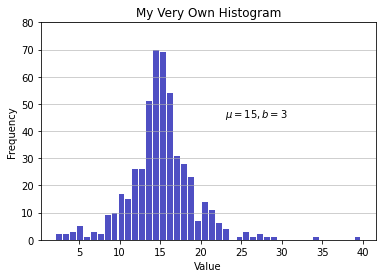

In [24]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 80.0)

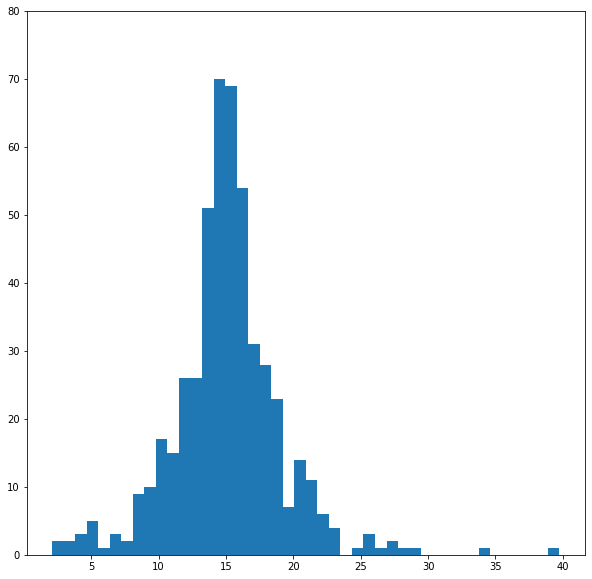

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
ax.hist(d, bins='auto', label=('value','frequency'))
ax.set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)